In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

# 4.5.1. Definindo o Modelo

The built-in __call__ method then invokes forward whenever we need to apply the network to some input.

In [ ]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

# 4.5.2. Softmax revisitado

Na Seção 4.4 calculamos o resultado do nosso modelo e aplicamos a perda de entropia cruzada. Embora isto seja perfeitamente razoável matematicamente, é arriscado computacionalmente, devido ao underflow e overflow numéricos na exponenciação.

Através de manipulações algébricas, passamos a utilizar o LogSumExp(LSE), também conhecido como RealSoftMax.


In [ ]:
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

# 4.5.3. Treinamento

Em seguida, treinamos nosso modelo. Usamos imagens Fashion-MNIST, achatadas em vetores de recursos de 784 dimensões.

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# 4.5.4. Resumo

Como antes, este algoritmo converge para uma solução razoavelmente precisa, embora desta vez com menos linhas de código do que antes.

APIs de alto nível são muito convenientes para ocultar de seus usuários aspectos potencialmente perigosos, como estabilidade numérica. 

Além disso, eles permitem que os usuários projetem modelos de forma concisa com poucas linhas de código. Isso é tanto benção quanto maldição. 

O benefício óbvio é que torna as coisas altamente acessíveis, mesmo para engenheiros que nunca tiveram uma única aula de estatística na vida (na verdade, eles fazem parte do público-alvo do livro). Mas esconder as arestas vivas também tem um preço: um desincentivo para adicionar componentes novos e diferentes por conta própria, já que há pouca memória muscular para fazer isso.

# Código Agrupado:



In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

# ------------------------------------------------------------------------------------
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

# ------------------------------------------------------------------------------------
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)




Este código não está rodando no PyCharm por erro de DataLoader. Correção do erro abaixo:

# CÓDIGO ALTERADO PARA RODAR NO PyCharm

ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER (DataLoader worker) AO RODAR NO PYCHARM: \
FAZER num_workers=0 NA CLASSE FashionMNIST. 

return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=0)

PARA NÃO ALTERAR A CLASSE ORIGINAL, COPIO A CLASSE OU APENAS ALTERO A FUNÇÃO ESPECÍFICA UTILIZANDO DECORATOR(@).

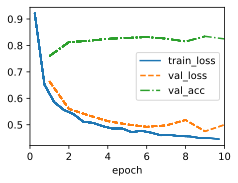

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l



# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


# ------------------------------------------------------------------------------------
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

# ------------------------------------------------------------------------------------
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

# ------------------------------------------------------------------------------------
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)




# CÓDIGO ALTERADO PARA NÃO PLOTAR, COPIANDO/ALTERANDO A CLASSE INTEIRA

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import torchvision
from torchvision import transforms





# --------------------------------

# -------------------------------------------------------------------------------------
class Module(d2l.nn_Module, d2l.HyperParameters):
    """The base class of models.

    Defined in :numref:`sec_oo-design`"""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = d2l.ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        # self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        # self.board.draw(x, d2l.numpy(d2l.to(value, d2l.cpu())),
        #                 ('train_' if train else 'val_') + key,
        #                 every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        # self.plot('loss', l, train=True)
        print(f'train_loss: {l}')
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        # self.plot('loss', l, train=False)
        print(f'val1_loss: {l}')


    def configure_optimizers(self):
        raise NotImplementedError

    def configure_optimizers(self):
        """Defined in :numref:`sec_classification`"""
        return torch.optim.SGD(self.parameters(), lr=self.lr)

    def apply_init(self, inputs, init=None):
        """Defined in :numref:`sec_lazy_init`"""
        self.forward(*inputs)
        if init is not None:
            self.net.apply(init)



# -----------------------------------------------------------------------------------
class Classifier(Module):
    """The base class of classification models.

    Defined in :numref:`sec_classification`"""

    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        # self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        print(f'val_loss: {self.loss(Y_hat, batch[-1])}')
        # self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)
        print(f'val_acc: {self.accuracy(Y_hat, batch[-1])}\n')

    def accuracy(self, Y_hat, Y, averaged=True):
        """Compute the number of correct predictions.

        Defined in :numref:`sec_classification`"""
        Y_hat = d2l.reshape(Y_hat, (-1, Y_hat.shape[-1]))
        preds = d2l.astype(d2l.argmax(Y_hat, axis=1), Y.dtype)
        compare = d2l.astype(preds == d2l.reshape(Y, -1), d2l.float32)
        return d2l.reduce_mean(compare) if averaged else compare

    def loss(self, Y_hat, Y, averaged=True):
        """Defined in :numref:`sec_softmax_concise`"""
        Y_hat = d2l.reshape(Y_hat, (-1, Y_hat.shape[-1]))
        Y = d2l.reshape(Y, (-1,))
        return F.cross_entropy(
            Y_hat, Y, reduction='mean' if averaged else 'none')

    def layer_summary(self, X_shape):
        """Defined in :numref:`sec_lenet`"""
        X = d2l.randn(*X_shape)
        for layer in self.net:
            X = layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)




# ---------------------------------




# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.
#
# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)
#
# PARA NÃO ALTERAR A CLASSE ORIGINAL, COPIO A CLASSE AQUI.

class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset.

    Defined in :numref:`sec_fashion_mnist`"""

    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Return text labels.

        Defined in :numref:`sec_fashion_mnist`"""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]

    def get_dataloader(self, train):
        """Defined in :numref:`sec_fashion_mnist`"""
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                           num_workers=0)

    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        """Defined in :numref:`sec_fashion_mnist`"""
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)


# -----------------------------------------------------------------------------------------------------------------------------



# data = d2l.FashionMNIST(batch_size=256)
# data = FashionMNIST(batch_size=256)           # Chamo a classe que está aqui e não a original.

# -----------------------------------------------------------------------------------------------------------------------------





# ------------------------------------------------------------------------------------
class SoftmaxRegression(Classifier):  # <<--------------------------------Classifier, ao invés de d2l.Classifier, pois Classifier está neste código.
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

# ------------------------------------------------------------------------------------
@d2l.add_to_class(Classifier)  # <<--------------------------------Classifier, ao invés de d2l.Classifier, pois Classifier está neste código.
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

# ------------------------------------------------------------------------------------
data = FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)




# CÓDIGO ALTERADO PARA NÃO PLOTAR, COPIANDO/ALTERANDO APENAS AS FUNÇÕES ESPECÍFICAS DA CLASSE UTILIZANDO @

UTILIZANDO DECORATOR(@) PARA ALTERAR A FUNÇÃO ESPECÍFICA: 
@d2l.add_to_class(Classe_Base) 

A Classe_Base é a Classe na qual a função está inserida, mesmo que está tenha uma classe base interna.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import torchvision
from torchvision import transforms



# ------------------------------------------------------------------------
# ------------------------------------------------------------------------
# ALTERAÇÕES PARA NÃO PLOTAR:
@d2l.add_to_class(d2l.Module)  # @save
def plot(self, key, value, train):
    """Plot a point in animation."""
    assert hasattr(self, 'trainer'), 'Trainer is not inited'
    # self.board.xlabel = 'epoch'
    if train:
        x = self.trainer.train_batch_idx / \
            self.trainer.num_train_batches
        n = self.trainer.num_train_batches / \
            self.plot_train_per_epoch
    else:
        x = self.trainer.epoch + 1
        n = self.trainer.num_val_batches / \
            self.plot_valid_per_epoch
    # self.board.draw(x, d2l.numpy(d2l.to(value, d2l.cpu())),
    #                 ('train_' if train else 'val_') + key,
    #                 every_n=int(n))


@d2l.add_to_class(d2l.Module)  # @save
def training_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    # self.plot('loss', l, train=True)
    print(f'train_loss: {l}')
    return l


@d2l.add_to_class(d2l.Module)  # @save
def validation_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    # self.plot('loss', l, train=False)
    print(f'val1_loss: {l}')


# ------------------------------------------------------------------------

@d2l.add_to_class(d2l.Classifier)  # @save
def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    # self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
    print(f'val_loss: {self.loss(Y_hat, batch[-1])}')
    # self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)
    print(f'val_acc: {self.accuracy(Y_hat, batch[-1])}\n')


# ------------------------------------------------------------------------
# ------------------------------------------------------------------------



# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)


data = d2l.FashionMNIST(batch_size=256)
# data = FashionMNIST(batch_size=256)           # Chamo a classe que está aqui e não a original.
# ------------------------------------------------------------------------------------







# ------------------------------------------------------------------------------------
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

# ------------------------------------------------------------------------------------
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

# ------------------------------------------------------------------------------------

model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)




# Exercícios

# Ex. 1.
O aprendizado profundo usa muitos formatos numéricos diferentes, incluindo precisão dupla FP64 (usado extremamente raramente), precisão simples FP32, BFLOAT16 (bom para representações compactadas), FP16 (muito instável), TF32 (um novo formato da NVIDIA) e INT8. Calcule o menor e o maior argumento da função exponencial para o qual o resultado não leva a estouro ou estouro numérico.

In [ ]:
import numpy as np
from numpy import exp
import torch


class F64:
    def f64():

    # def max_f64():
        for i in range(0,1000):
            func = np.float64(exp(i))
            # func = 10**i
            # print(f'i={i} : func={func}')
            if func == np.inf:
                break
        print(f'Maior argumento de float 64 é {np.float64(exp(i-1))}, com expoente {i-1}.')
        maior = np.float64(exp(i-1))

    # def min_f64():
    #     for i in range(0,-1000,-1):
        for i in range(0, 1000):
            func = -np.float64(exp(i))
            # func = 10**i
            # print(f'i={i} : func={func}')
            if func == -np.inf:
                break
        print(f'Menor argumento de float 64 é {-np.float64(exp(i-1))}, com expoente {i-1}.')
        menor = -np.float64(exp(i-1))

        return maior,menor


class F32:
    def f32():

    # def max_f32():
        for i in range(0,1000):
            func = np.float32(exp(i))
            # func = 10**i
            # print(f'i={i} : func={func}')
            if func == np.inf:
                break
        print(f'Maior argumento de float 32 é {np.float32(exp(i-1))}, com expoente {i-1}.')
        maior = np.float32(exp(i-1))

    # def min_f32():
    #     for i in range(0,-1000,-1):
        for i in range(0, 1000):
            func = -np.float32(exp(i))
            # func = 10**i
            # print(f'i={i} : func={func}')
            if func == -np.inf:
                break
        print(f'Menor argumento de float 32 é {-np.float32(exp(i-1))}, com expoente {i-1}.')
        menor = -np.float32(exp(i-1))

        return maior,menor


class F16:
    def f16():

    # def max_f16():
        for i in range(0,1000):
            func = np.float16(exp(i))
            # func = 10**i
            # print(f'i={i} : func={func}')
            if func == np.inf:
                break
        print(f'Maior argumento de float 16 é {np.float16(exp(i-1))}, com expoente {i-1}.')
        maior = np.float16(exp(i-1))

    # def min_f16():
    #     for i in range(0,-1000,-1):
        for i in range(0, 1000):
            func = -np.float16(exp(i))
            # func = 10**i
            # print(f'i={i} : func={func}')
            if func == -np.inf:
                break
        print(f'Menor argumento de float 16 é {-np.float16(exp(i-1))}, com expoente {i-1}.')
        menor = -np.float16(exp(i-1))

        return maior,menor


class_flo64 = F64.f64()
class_flo32 = F32.f32()
class_flo16 = F16.f16()

flo64 = np.finfo('float64')
flo32 = np.finfo('float32')
flo16 = np.finfo('float16')

tor_flo64 = torch.finfo(torch.float64)
tor_flo32 = torch.finfo(torch.float32)
tor_flo16 = torch.finfo(torch.float16)

tor_int8 = torch.iinfo(torch.int8)
tor_bflo16 = torch.finfo(torch.bfloat16)


# Ex. 3

Aumente o número de épocas de treinamento. Por que a precisão da validação pode diminuir depois de um tempo? Como poderíamos consertar isso?

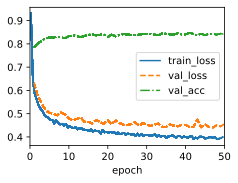

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import time


inicio = time.time()

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


# ------------------------------------------------------------------------------------
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

# ------------------------------------------------------------------------------------
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

# ------------------------------------------------------------------------------------
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=50)
trainer.fit(model, data)


fim = time.time()
tempo_gasto = fim - inicio

# Ex. 4:

What happens as you increase the learning rate? Compare the loss curves for several learning rates. Which one works better? When?

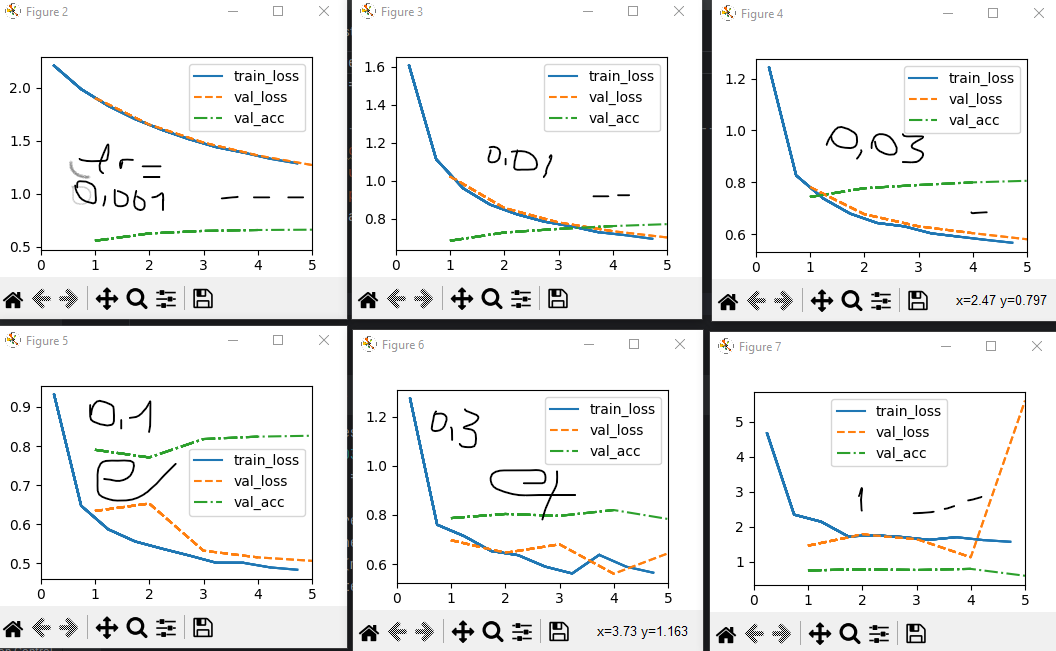